<a href="https://colab.research.google.com/github/prajwalgotmare/Pepsi_coke_classification/blob/main/Classification_dir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

In [ ]:
import os

path = "/content/drive/MyDrive/kaggle_dataset/pepsi_cola"

# Print the path
print("Path:", path)

# Print the contents of the test and train directories
for directory in ["test", "train"]:
    directory_path = os.path.join(path, directory)
    print(f"\nContents of {directory_path}:")
    for item in os.listdir(directory_path):
        item_path = os.path.join(directory_path, item)
        if os.path.isdir(item_path):
            print("[Folder]", item_path)
        else:
            print("[File]", item_path)


Path: /content/drive/MyDrive/kaggle_dataset/pepsi_cola

Contents of /content/drive/MyDrive/kaggle_dataset/pepsi_cola/test:
[Folder] /content/drive/MyDrive/kaggle_dataset/pepsi_cola/test/pepsi
[Folder] /content/drive/MyDrive/kaggle_dataset/pepsi_cola/test/cocacola

Contents of /content/drive/MyDrive/kaggle_dataset/pepsi_cola/train:
[Folder] /content/drive/MyDrive/kaggle_dataset/pepsi_cola/train/cocacola
[Folder] /content/drive/MyDrive/kaggle_dataset/pepsi_cola/train/pepsi


In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [ ]:
train_path = "/content/drive/MyDrive/kaggle_dataset/pepsi_cola/train"
test_path = "/content/drive/MyDrive/kaggle_dataset/pepsi_cola/test"

train_image_paths = []
test_image_paths = []

# Loop through the train dataset and append image paths to the train_image_paths list
for root, dirs, files in os.walk(train_path):
    for file in files:
        if file.endswith(".jpg"):
            train_image_paths.append(os.path.join(root, file))

# Loop through the test dataset and append image paths to the test_image_paths list
for root, dirs, files in os.walk(test_path):
    for file in files:
        if file.endswith(".jpg"):
            test_image_paths.append(os.path.join(root, file))

In [ ]:
labels = []
for image_path in image_paths:
    label = os.path.basename(os.path.dirname(image_path))
    labels.append(label)


In [ ]:
X = []
for image_path in image_paths:
    img = cv2.imread(image_path)
    img = cv2.resize(img, (230, 270))
    img = img.astype('float32') / 255
    X.append(img)
X = np.array(X)


# Using traditional Machine learning Algorithms

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator


In [ ]:
train_dir = '/content/drive/MyDrive/kaggle_dataset/pepsi_cola/train'
test_dir = '/content/drive/MyDrive/kaggle_dataset/pepsi_cola/test'

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(230, 270),
        batch_size=32,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(230, 270),
        batch_size=32,
        class_mode='binary')


Found 340 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [ ]:
X_train, y_train = train_generator.next()
X_test, y_test = test_generator.next()

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(230, 270),
        batch_size=32,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(230, 270),
        batch_size=32,
        class_mode='binary')

Found 340 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [ ]:
model = LogisticRegression(max_iter=1000)
# OR
model = SVC(kernel='rbf')
# OR
model = RandomForestClassifier(n_estimators=100)


In [ ]:
model.fit(X_train.reshape(X_train.shape[0], -1), y_train)


RandomForestClassifier()

Found 340 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


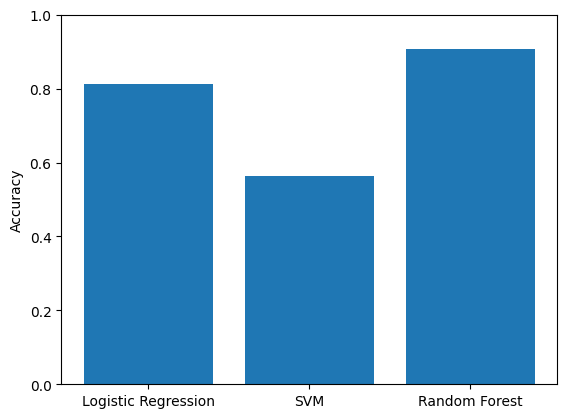

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(42)

# Set up the image data generator
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Set up the data directories
train_dir = '/content/drive/MyDrive/kaggle_dataset/pepsi_cola/train'
test_dir = '/content/drive/MyDrive/kaggle_dataset/pepsi_cola/test'

# Set up the data generators
batch_size = 32
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(230, 270),
    batch_size=batch_size,
    class_mode='binary'
)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(230, 270),
    batch_size=batch_size,
    class_mode='binary'
)

# Set up the list of models to test
models = [LogisticRegression(), SVC(kernel='rbf'), RandomForestClassifier(n_estimators=100)]

# Train each model and store the accuracies
accuracies = []
for model in models:
    # Train the model
    model.fit(
        train_generator[0][0].reshape((batch_size, -1)),
        train_generator[0][1]
    )
    
    # Make predictions on the test data
    y_pred = model.predict(
        test_generator[0][0].reshape((batch_size, -1))
    )
    
    # Compute the accuracy of the model
    acc = accuracy_score(test_generator[0][1], y_pred)
    accuracies.append(acc)

# Plot the accuracies of each model
plt.bar(['Logistic Regression', 'SVM', 'Random Forest'], accuracies)
plt.ylim([0, 1])
plt.ylabel('Accuracy')
plt.show()
